In [ ]:
!python run.py batch 
--source /nlp/data/karthik9/Sprint1/Dental/Data/oral_cancer_mds/ 
--target /nlp/data/karthik9/Sprint1/Dental/Data/oral_cancer_jsons/patient_population_characteristics1.json 
--max-examples 2

Language model configured successfully
Cleared ./.semantic_cache
Cleared ./.evaluation_cache
Async Medical File Handler defined successfully
Updated Patient Population Characteristics signatures and modules with new nested structure defined successfully
SCALPEL - Batch Extraction Mode
Loaded 12 existing records from dspy_history_batch.csv

Creating examples from: /nlp/data/karthik9/Sprint1/Dental/Data/oral_cancer_mds/
Using target: /nlp/data/karthik9/Sprint1/Dental/Data/oral_cancer_jsons/patient_population_characteristics1.json
Total folders found: 15
Examples created: 15
Missed studies: 0

Processing 2 examples...


EXAMPLE 1/2: Jayasinghe_2020
Total Missed Fields:  0
Total Incorrect Fields:  3
List of Missed Fields:  []
List of Incorrect Fields:  ['population.suspicious_or_malignant_lesions.comment', 'target_condition.other.selected', 'filename']
Overall Field Accuracy: 89.66% (26/29)

BASELINE EVALUATION RESULTS:
num_extracted........................... 1
completeness...............

## View Dashboards Interactively

You can import and run extraction directly in this notebook to see interactive dashboards!


In [3]:
# Import necessary modules
import asyncio
import sys
sys.path.insert(0, '/nlp/data/karthik9/Sprint1/Dental/dspy_scribe')

from utils.lm_config import *
from data.loader import create_examples_for_all_studies
from src.extractor import run_async_extraction_and_evaluation
from src.helpers.visualization import create_performance_dashboards
from collections import defaultdict

# Enable inline plotting for Jupyter
%matplotlib inline

print("✓ Modules loaded successfully!")


Language model configured successfully
Async Medical File Handler defined successfully
Updated Patient Population Characteristics signatures and modules with new nested structure defined successfully
✓ Modules loaded successfully!


In [4]:
# Run batch extraction
md_dir = "/nlp/data/karthik9/Sprint1/Dental/Data/oral_cancer_mds/"
target_file = "/nlp/data/karthik9/Sprint1/Dental/Data/oral_cancer_jsons/patient_population_characteristics1.json"

# Create examples
all_examples = create_examples_for_all_studies(md_dir, target_file)[:2]  # First 2 examples

# Metrics collection
f1_scores = []
precision_scores = []
recall_scores = []
completeness_scores = []
aggregated_field_counts = defaultdict(lambda: {
    'gt_count': 0, 'extracted_count': 0, 'matched': 0, 
    'missing': 0, 'incorrect': 0, 'extra': 0
})

# Process examples
for i, example in enumerate(all_examples):
    print(f"\n{'='*50}")
    print(f"EXAMPLE {i+1}/{len(all_examples)}: {example.extracted_records[0].get('filename', 'Unknown')}")
    print(f"{'='*50}")
    
    markdown_content = example.markdown_content
    ground_truth = example.extracted_records
    filename = ground_truth[0].get('filename', 'Unknown')
    source_file = f"{md_dir}/{filename}_md/{filename}_md.json"
    
    # Run extraction
    result_dict = await run_async_extraction_and_evaluation(
        markdown_content=markdown_content,
        source_file=source_file,
        one_study_records=ground_truth,
        override=False,
        field_level_analysis=True,
        print_field_table=False
    )
    
    # Collect metrics
    evaluation = result_dict['baseline_evaluation']
    field_counts = result_dict['field_counts']
    
    f1_scores.append(evaluation['f1'])
    precision_scores.append(evaluation['precision'])
    recall_scores.append(evaluation['recall'])
    completeness_scores.append(evaluation['completeness'])
    
    # Aggregate field counts
    for field, counts in field_counts.items():
        for key in ['gt_count', 'extracted_count', 'matched', 'missing', 'incorrect', 'extra']:
            aggregated_field_counts[field][key] += counts[key]

# Calculate averages
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\n{'='*60}")
print(f"FINAL SUMMARY")
print(f"{'='*60}")
print(f"Average Precision: {avg_precision:.3f}")
print(f"Average Recall: {avg_recall:.3f}")
print(f"Average F1 Score: {avg_f1:.3f}")


Total folders found: 15
Examples created: 15
Missed studies: 0

EXAMPLE 1/2: Jayasinghe_2020
Total Missed Fields:  0
Total Incorrect Fields:  3
List of Missed Fields:  []
List of Incorrect Fields:  ['population.suspicious_or_malignant_lesions.comment', 'target_condition.other.selected', 'filename']
Overall Field Accuracy: 89.66% (26/29)

BASELINE EVALUATION RESULTS:
num_extracted........................... 1
completeness............................ 1.0000
semantic_enabled........................ True
precision............................... 1.0000
recall.................................. 1.0000
f1...................................... 1.0000
TP...................................... 1
FP...................................... 0
FN...................................... 0
cohens_kappa............................ 0.9501
num_ground_truth........................ 1


EXAMPLE 2/2: Agrawal_2024
Total Missed Fields:  0
Total Incorrect Fields:  2
List of Missed Fields:  []
List of Incorrect Fields

/nlp/data/karthik9/Sprint1/Dental/dspy_scribe/src/helpers/visualization.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/nlp/data/karthik9/Sprint1/Dental/dspy_scribe/src/helpers/visualization.py:158: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x*100)}%' for x in ax.get_xticks()])


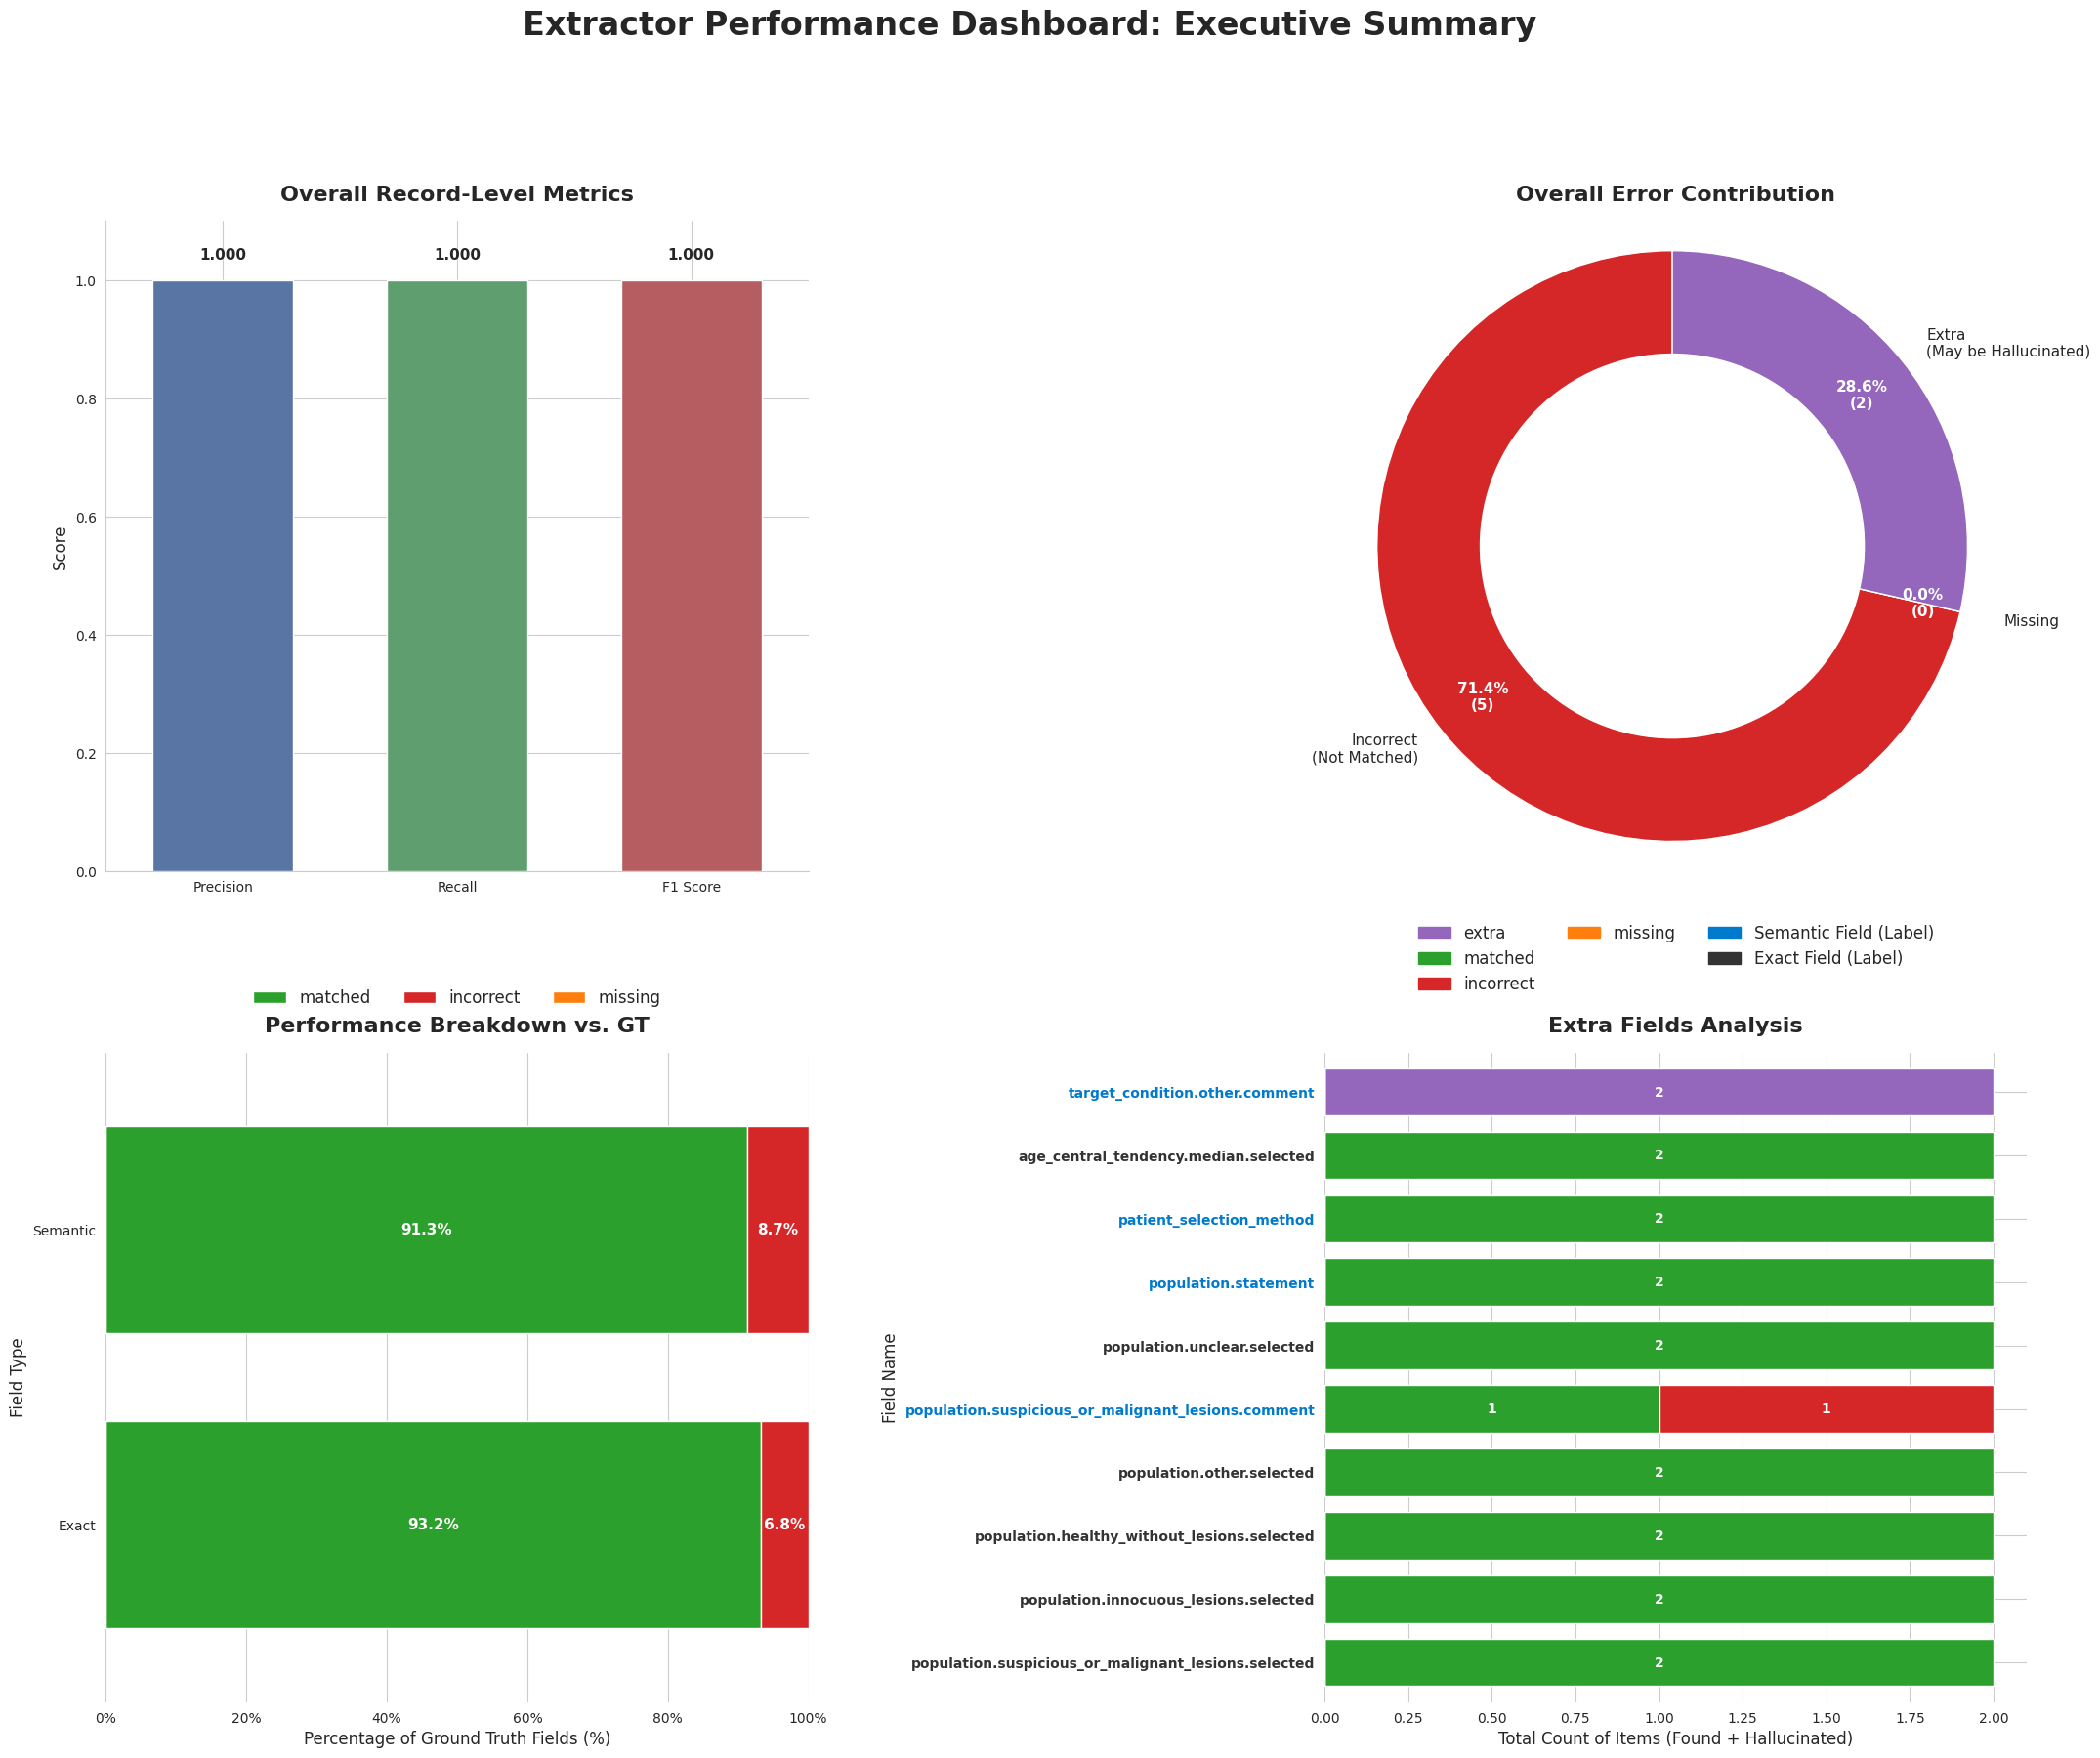

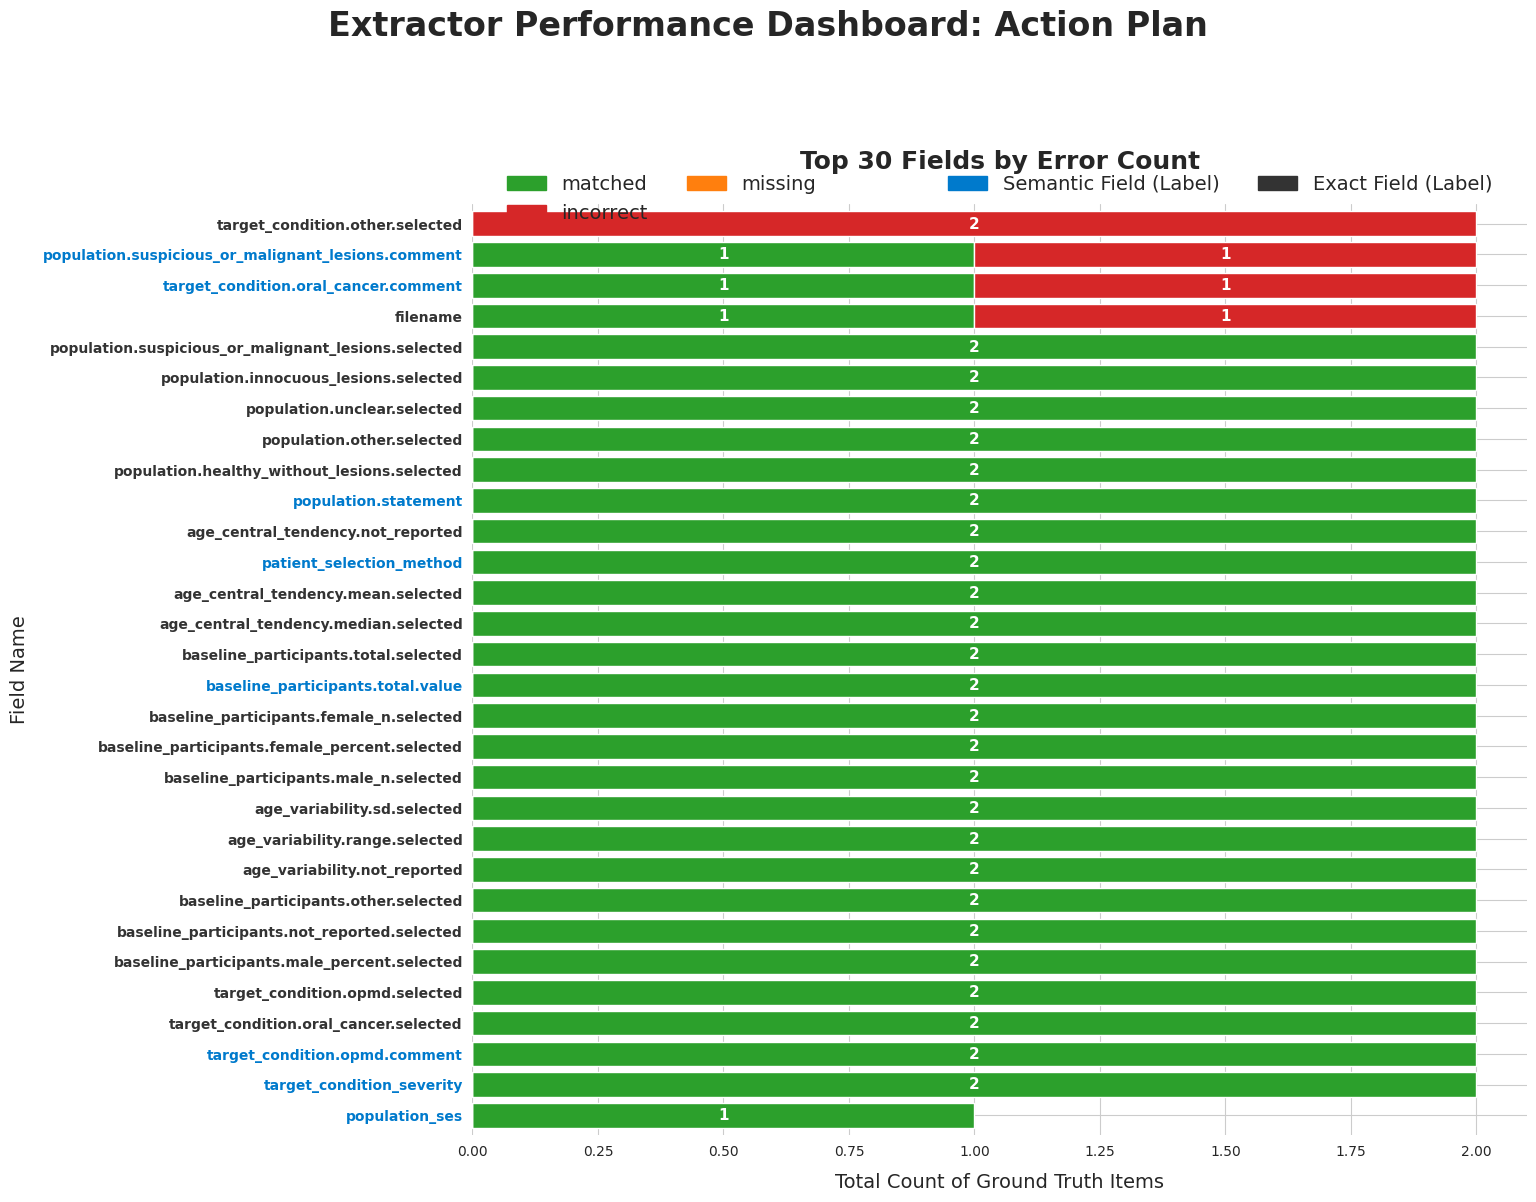

In [5]:
# Display dashboards interactively in the notebook
create_performance_dashboards(
    aggregated_field_counts=dict(aggregated_field_counts),
    avg_precision=avg_precision,
    avg_recall=avg_recall,
    avg_f1=avg_f1,
    save_to_file=False  # Interactive display
)

# Note: The dashboards will display inline in the notebook!
# To save as files instead, use: save_to_file=True
